# Multiple-objective portfolio optimization

# INTRODUCTION

Your task is to solve a multiple-objective portfolio optimization problem.
-  Use the basic Markowitz's model from 1952 (see Lecture 1)
-  Solve = construct Pareto front approximations.
-  The dataset is the same as for the portfolio game part 1 (bundle1.zip).
-  The dataset consists of the historical prices of 20 assets.
-  The bundle contains 20 files (*.txt) linked to different assets.
-  The name of the file suggests the asset's name.
-  The structure of every file is as follows:
1.  The first line contains the name of the asset.
2. The second line provides the number of data points N.
3. The following N lines are data points with the structure: time, price.
-  The historical timeline for all assets is time $\in$ [0,100].
-  Future predictions should be calculated for time = 200.

Goal: 
-  Load data, make predictions, and build the model. 
-  Illustrate your predictions (can be done in the jupyter notebook)
-  Then, implement the WSM and ECM methods (see the tutorial on quadratic programming provided below). 
-  Run your implementations for different calculation limits (e.g., the number of weight vectors for WSM). Compare the methods' efficiency in finding unique Pareto optimal solutions. Finally, illustrate generated Pareto fronts.

# Short tutorial on the cvxopt library for quadratic programming

In [1]:
import numpy as np
from cvxopt import matrix, solvers

# QP Optimization Problem

### General model:

$max$ $\boldsymbol{cx} - \dfrac{1}{2}\boldsymbol{x}^T\boldsymbol{Qx}$ <br>
$s.t.$ <br>
$\boldsymbol{Gx} \leq \boldsymbol{h}$ <br>
$\boldsymbol{x} \geq \boldsymbol{0}$

### But the library uses the following form:

$min$ $\boldsymbol{cx} + \dfrac{1}{2}\boldsymbol{x}^T\boldsymbol{Qx}$ <br>
$s.t.$ <br>
$\boldsymbol{Gx} \leq \boldsymbol{h}$ <br>
$\boldsymbol{Ax} = \boldsymbol{b}$ <br>

### Exmple

$min$ $2x^2_1+x_2^2+x_1x_2+x_1+x_2$ <br>
$s.t.$ <br>
$x_1 \geq 0$<br>
$x_2 \geq 0$<br>
$x_1 + x_2 = 1$<br>

### Hence:

In [2]:
Q = matrix([ [4.0, 1.0], [1.0, 2.0] ]) ## [4, 1] is 1st column, not row!

In [3]:
c = matrix([1.0, 1.0]) ### (1, 2) = dimensions (1 row and 2 columns)

In [4]:
A = matrix([1.0, 1.0], (1,2)) ### (1, 2) = dimensions (1 row and 2 columns)

In [5]:
b = matrix(1.0) 

In [6]:
G = matrix([[-1.0,0.0],[0.0,-1.0]]) ### multiplied both sides by -1

In [7]:
h = matrix([0.0,0.0]) ### multiplied both sides by -1

In [8]:
solQP=solvers.qp(Q, c, G, h, A, b)

     pcost       dcost       gap    pres   dres
 0:  1.8889e+00  7.7778e-01  1e+00  2e-16  2e+00
 1:  1.8769e+00  1.8320e+00  4e-02  1e-16  6e-02
 2:  1.8750e+00  1.8739e+00  1e-03  2e-16  5e-04
 3:  1.8750e+00  1.8750e+00  1e-05  1e-16  5e-06
 4:  1.8750e+00  1.8750e+00  1e-07  3e-16  5e-08
Optimal solution found.


In [9]:
print(solQP.keys())

dict_keys(['x', 'y', 's', 'z', 'status', 'gap', 'relative gap', 'primal objective', 'dual objective', 'primal infeasibility', 'dual infeasibility', 'primal slack', 'dual slack', 'iterations'])


In [10]:
print(solQP['x'])
print(solQP['primal objective'])

[ 2.50e-01]
[ 7.50e-01]

1.875000000000018


# We can also solve LP problems:

$min$ $\boldsymbol{c}\boldsymbol{x}$ <br>
$s.t.$ <br>
$\boldsymbol{Gx} \leq \boldsymbol{h}$ <br>
$\boldsymbol{Ax} = \boldsymbol{b}$ (optional)

### Exmple

$min$ $2x_1+x_2$ <br>
$s.t.$ <br>
$-x_1 +x_2 \leq 1$ <br>
$x_1 + x_2 \geq 2$ <br>
$x_2 \geq 0$<br>
$x_1 - 2x_2 \leq 4$

In [11]:
G = matrix([ [-1.0, -1.0, 0.0, 1.0], [1.0, -1.0, -1.0, -2.0] ])
h = matrix([ 1.0, -2.0, 0.0, 4.0 ])
c = matrix([ 2.0, 1.0 ])
solLP = solvers.lp(c,G,h)  
###!!!! OPTIONALLY A and b can be provided (equality constraints) as in solQP=solvers.qp(Q, c, G, h, A, b)

     pcost       dcost       gap    pres   dres   k/t
 0:  2.6471e+00 -7.0588e-01  2e+01  8e-01  2e+00  1e+00
 1:  3.0726e+00  2.8437e+00  1e+00  1e-01  2e-01  3e-01
 2:  2.4891e+00  2.4808e+00  1e-01  1e-02  2e-02  5e-02
 3:  2.4999e+00  2.4998e+00  1e-03  1e-04  2e-04  5e-04
 4:  2.5000e+00  2.5000e+00  1e-05  1e-06  2e-06  5e-06
 5:  2.5000e+00  2.5000e+00  1e-07  1e-08  2e-08  5e-08
Optimal solution found.


In [12]:
print(solLP.keys())

dict_keys(['x', 'y', 's', 'z', 'status', 'gap', 'relative gap', 'primal objective', 'dual objective', 'primal infeasibility', 'dual infeasibility', 'primal slack', 'dual slack', 'residual as primal infeasibility certificate', 'residual as dual infeasibility certificate', 'iterations'])


In [13]:
print(solLP['x'])
print(solLP['primal objective'])

[ 5.00e-01]
[ 1.50e+00]

2.4999999895543077


# Portfolio optimization

 Weight's Order:
 
 - 1 SuperFuture
 - 2 Apples
 - 3 WorldNow
 - 4 Electronics123
 - 5 Photons
 - 6 SpaceNow
 - 7 PearPear
 - 8 PositiveCorrelation
 - 9 BetterTechnology
 - 10 ABCDE
 - 11 EnviroLike
 - 12 Moneymakers
 - 13 Fuel4
 - 14 MarsProject
 - 15 CPU-XYZ
 - 16 RoboticsX
 - 17 Lasers
 - 18 WaterForce
 - 19 SafeAndCare
 - 20 BetterTomorrow

In [14]:
### SOLVE HERE

order = ["SuperFuture", "Apples", "WorldNow", "Electronics123", "Photons", "SpaceNow", "PearPear",
         "PositiveCorrelation", "BetterTechnology", "ABCDE", "EnviroLike", "Moneymakers", "Fuel4",
         "MarsProject", "CPU-XYZ", "RoboticsX", "Lasers", "WaterForce", "SafeAndCare", "BetterTomorrow"]

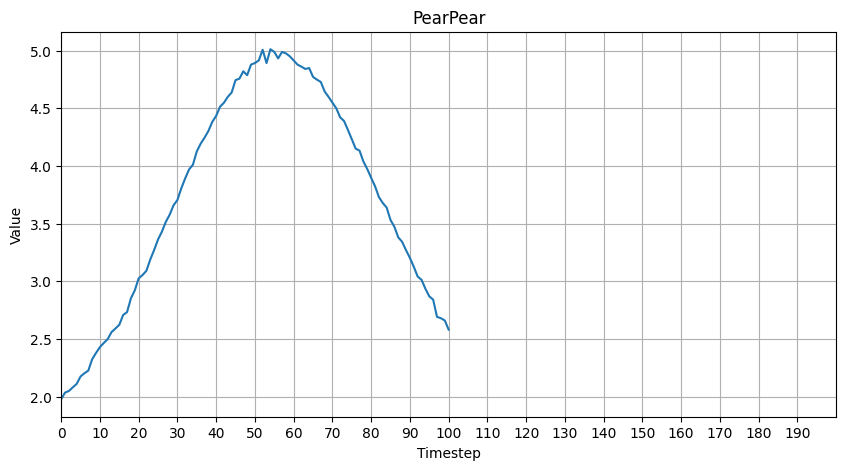

In [15]:
from utils.MOO_utilities import *

dr = DataReader("./data")
dr.read_data()
dr.plot(val_range=200)
data = dr.get_data()
assert len(data.keys()) == 20

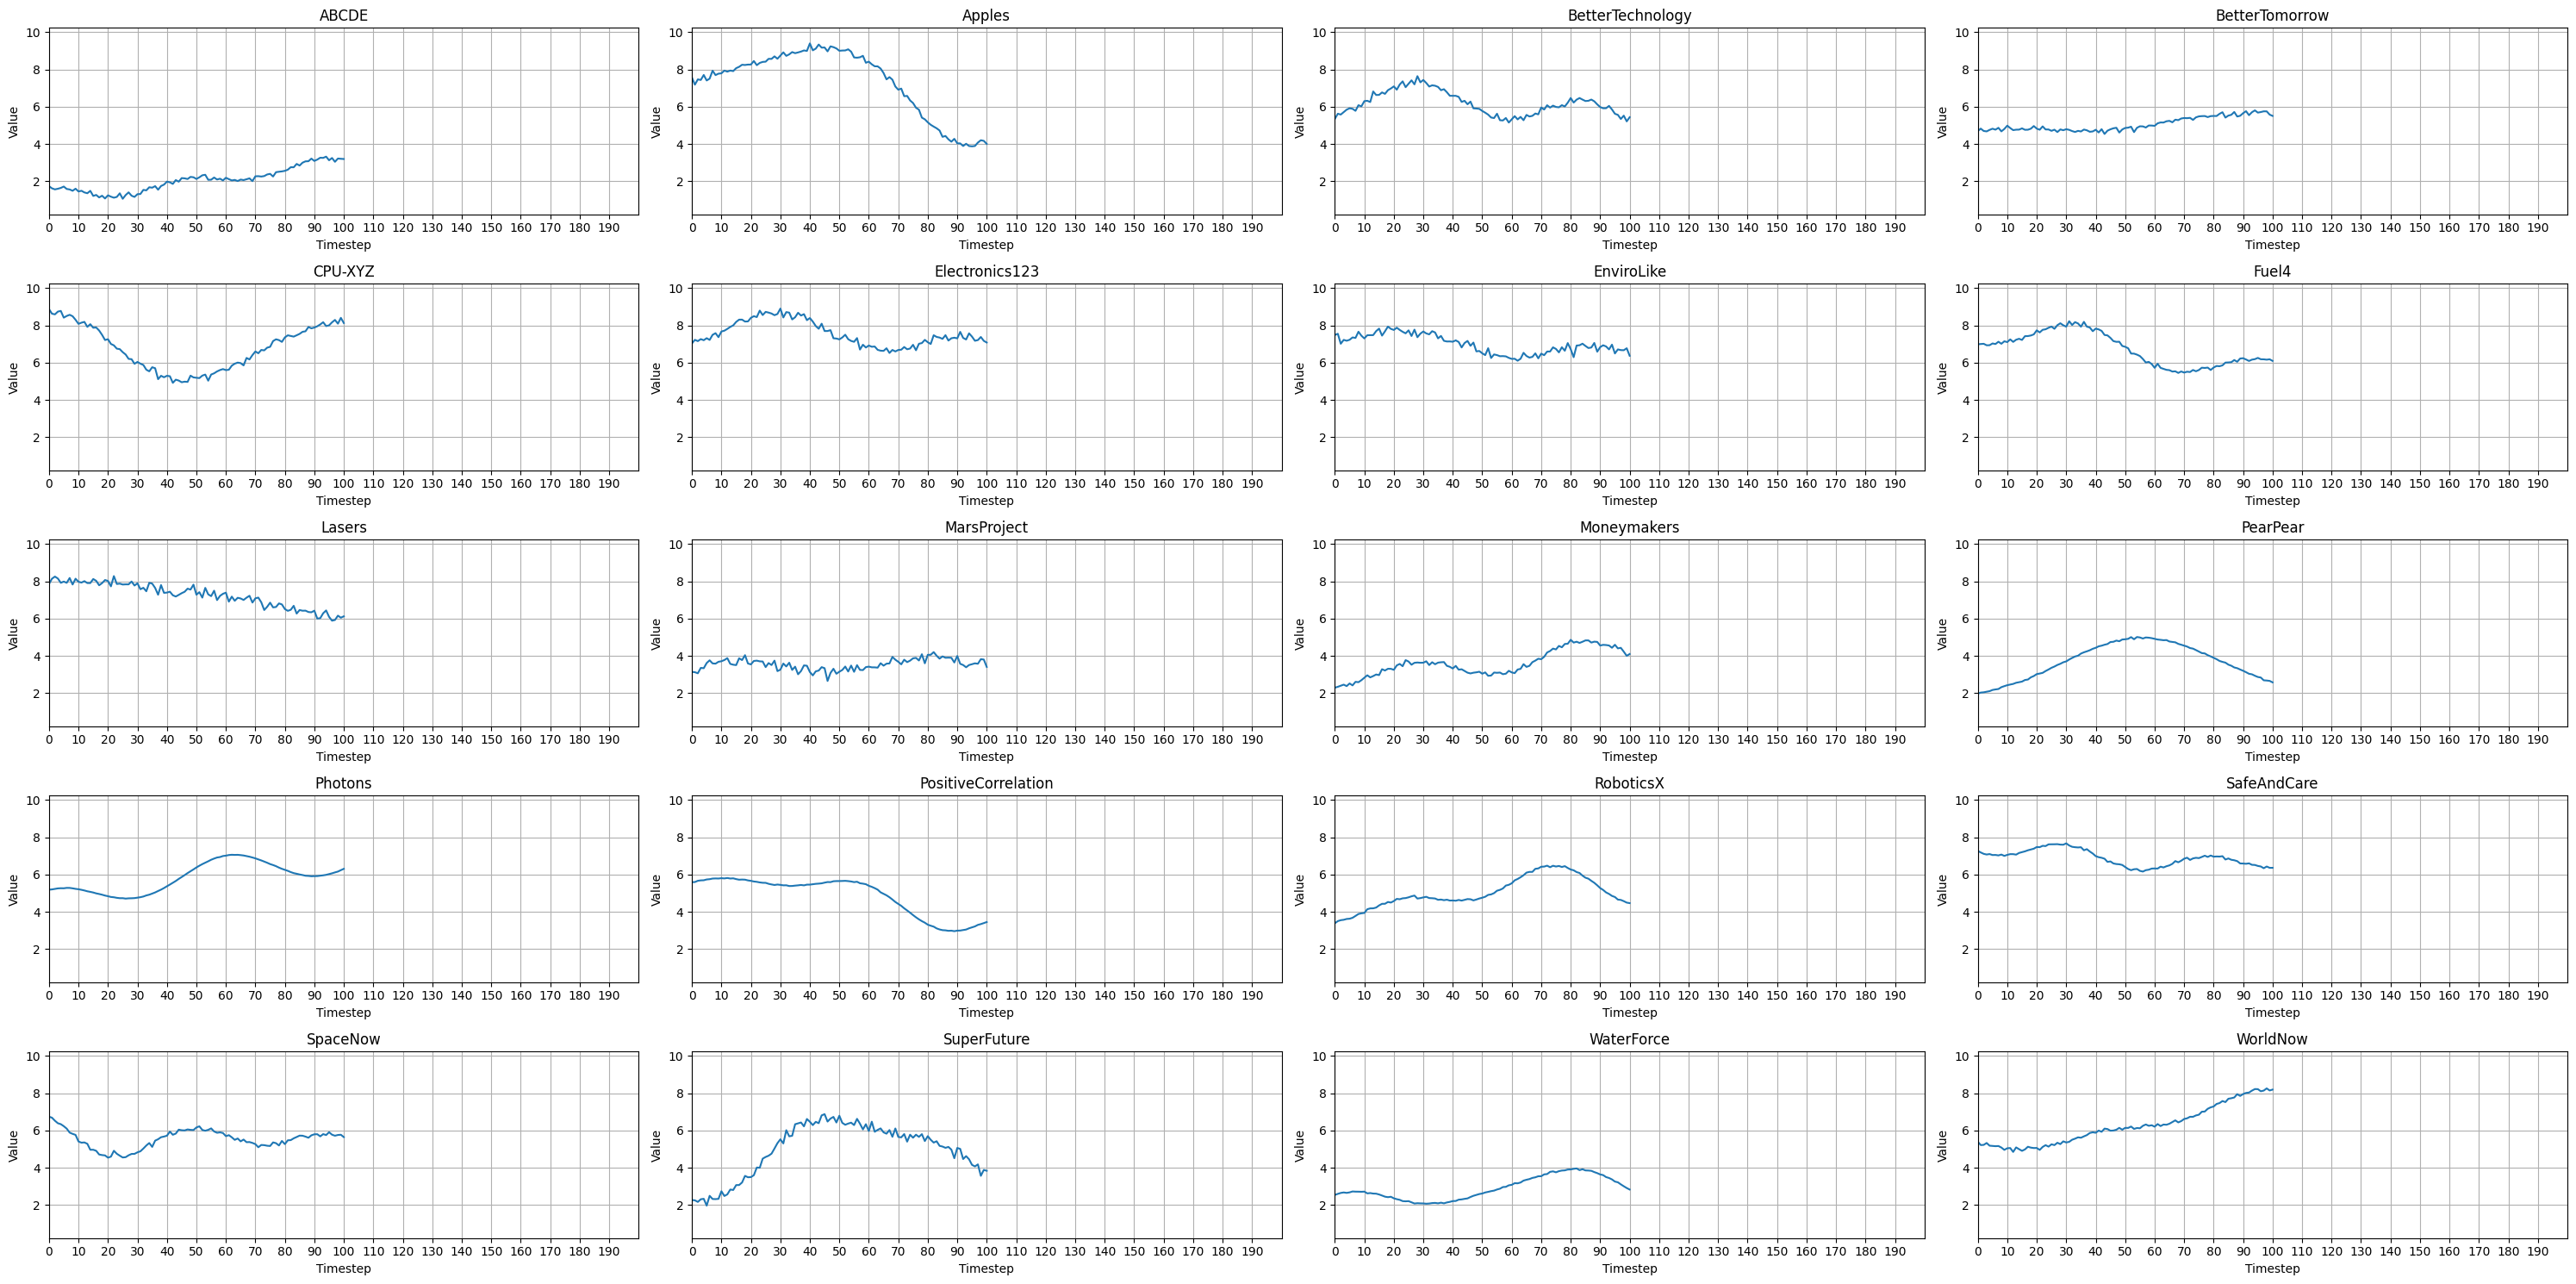

In [16]:
dr.plot_all(val_range=200, figsize=(30, 15), normalized_y=True)

ABCDE:
Train MAE error: 0.08201907575130463, MSE error: 0.01029469445347786
Test MAE error: 0.08074110746383667, MSE error: 0.009191672317683697
Apples:
Train MAE error: 0.08548153191804886, MSE error: 0.01286888774484396
Test MAE error: 0.13005217909812927, MSE error: 0.027168236672878265
BetterTechnology:
Train MAE error: 0.11035086959600449, MSE error: 0.01870994083583355
Test MAE error: 0.1361737698316574, MSE error: 0.02609802968800068
BetterTomorrow:
Train MAE error: 0.06828942149877548, MSE error: 0.006925040856003761
Test MAE error: 0.11203120648860931, MSE error: 0.01688466966152191
CPU-XYZ:
Train MAE error: 0.0945391058921814, MSE error: 0.01716328039765358
Test MAE error: 0.10852859169244766, MSE error: 0.017316624522209167
Electronics123:
Train MAE error: 0.1304876059293747, MSE error: 0.024011155590415
Test MAE error: 0.15389379858970642, MSE error: 0.030842015519738197
EnviroLike:
Train MAE error: 0.1398654729127884, MSE error: 0.029543045908212662
Test MAE error: 0.16378

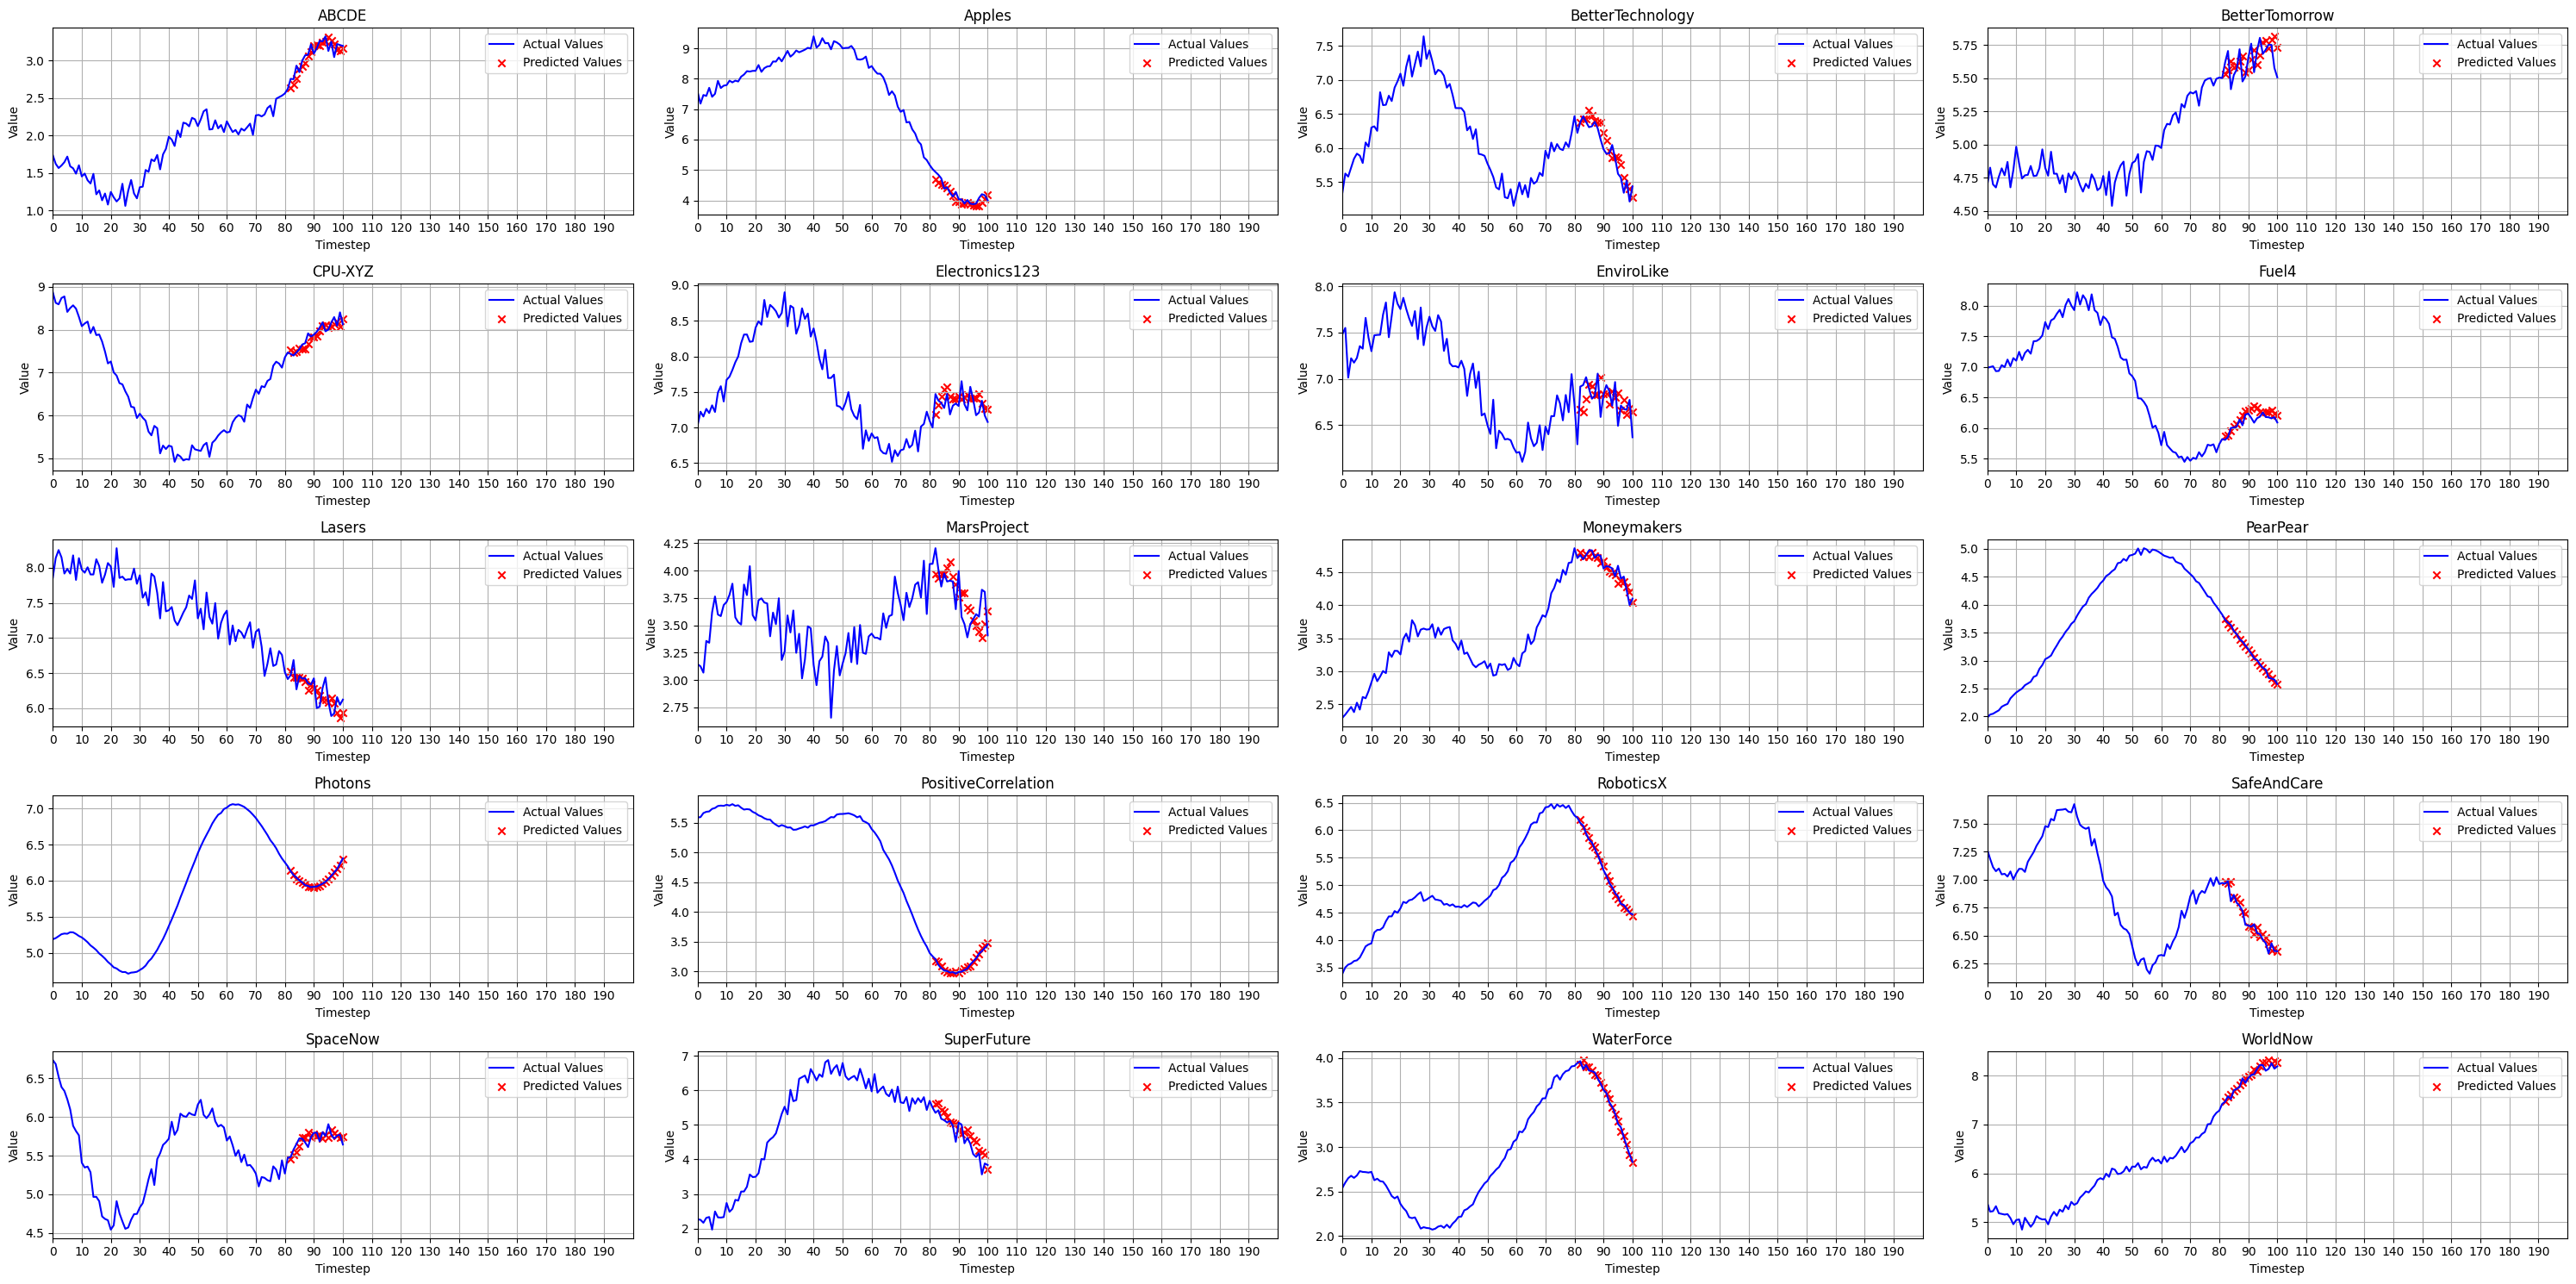

In [17]:
RMC = RegressionModelsCombined(data, window_size=10, test_size=0.2)
RMC.create_X_y()
RMC.train_linear_partial()
RMC.get_metrics(full=False)
RMC.plot_test_preds(val_range=200, figsize=(30, 15))

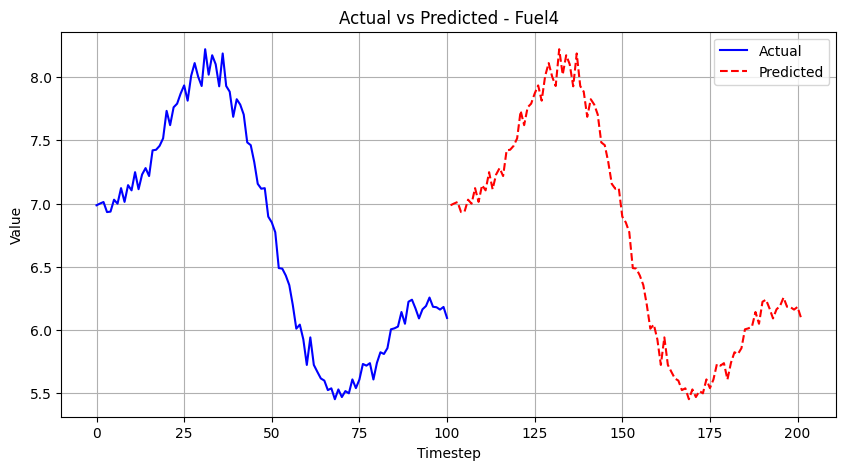

In [18]:
predicted_vals = data.copy()
risks = None
solver = Solver(data, predicted_vals, risks)
solver.plot_predictions()

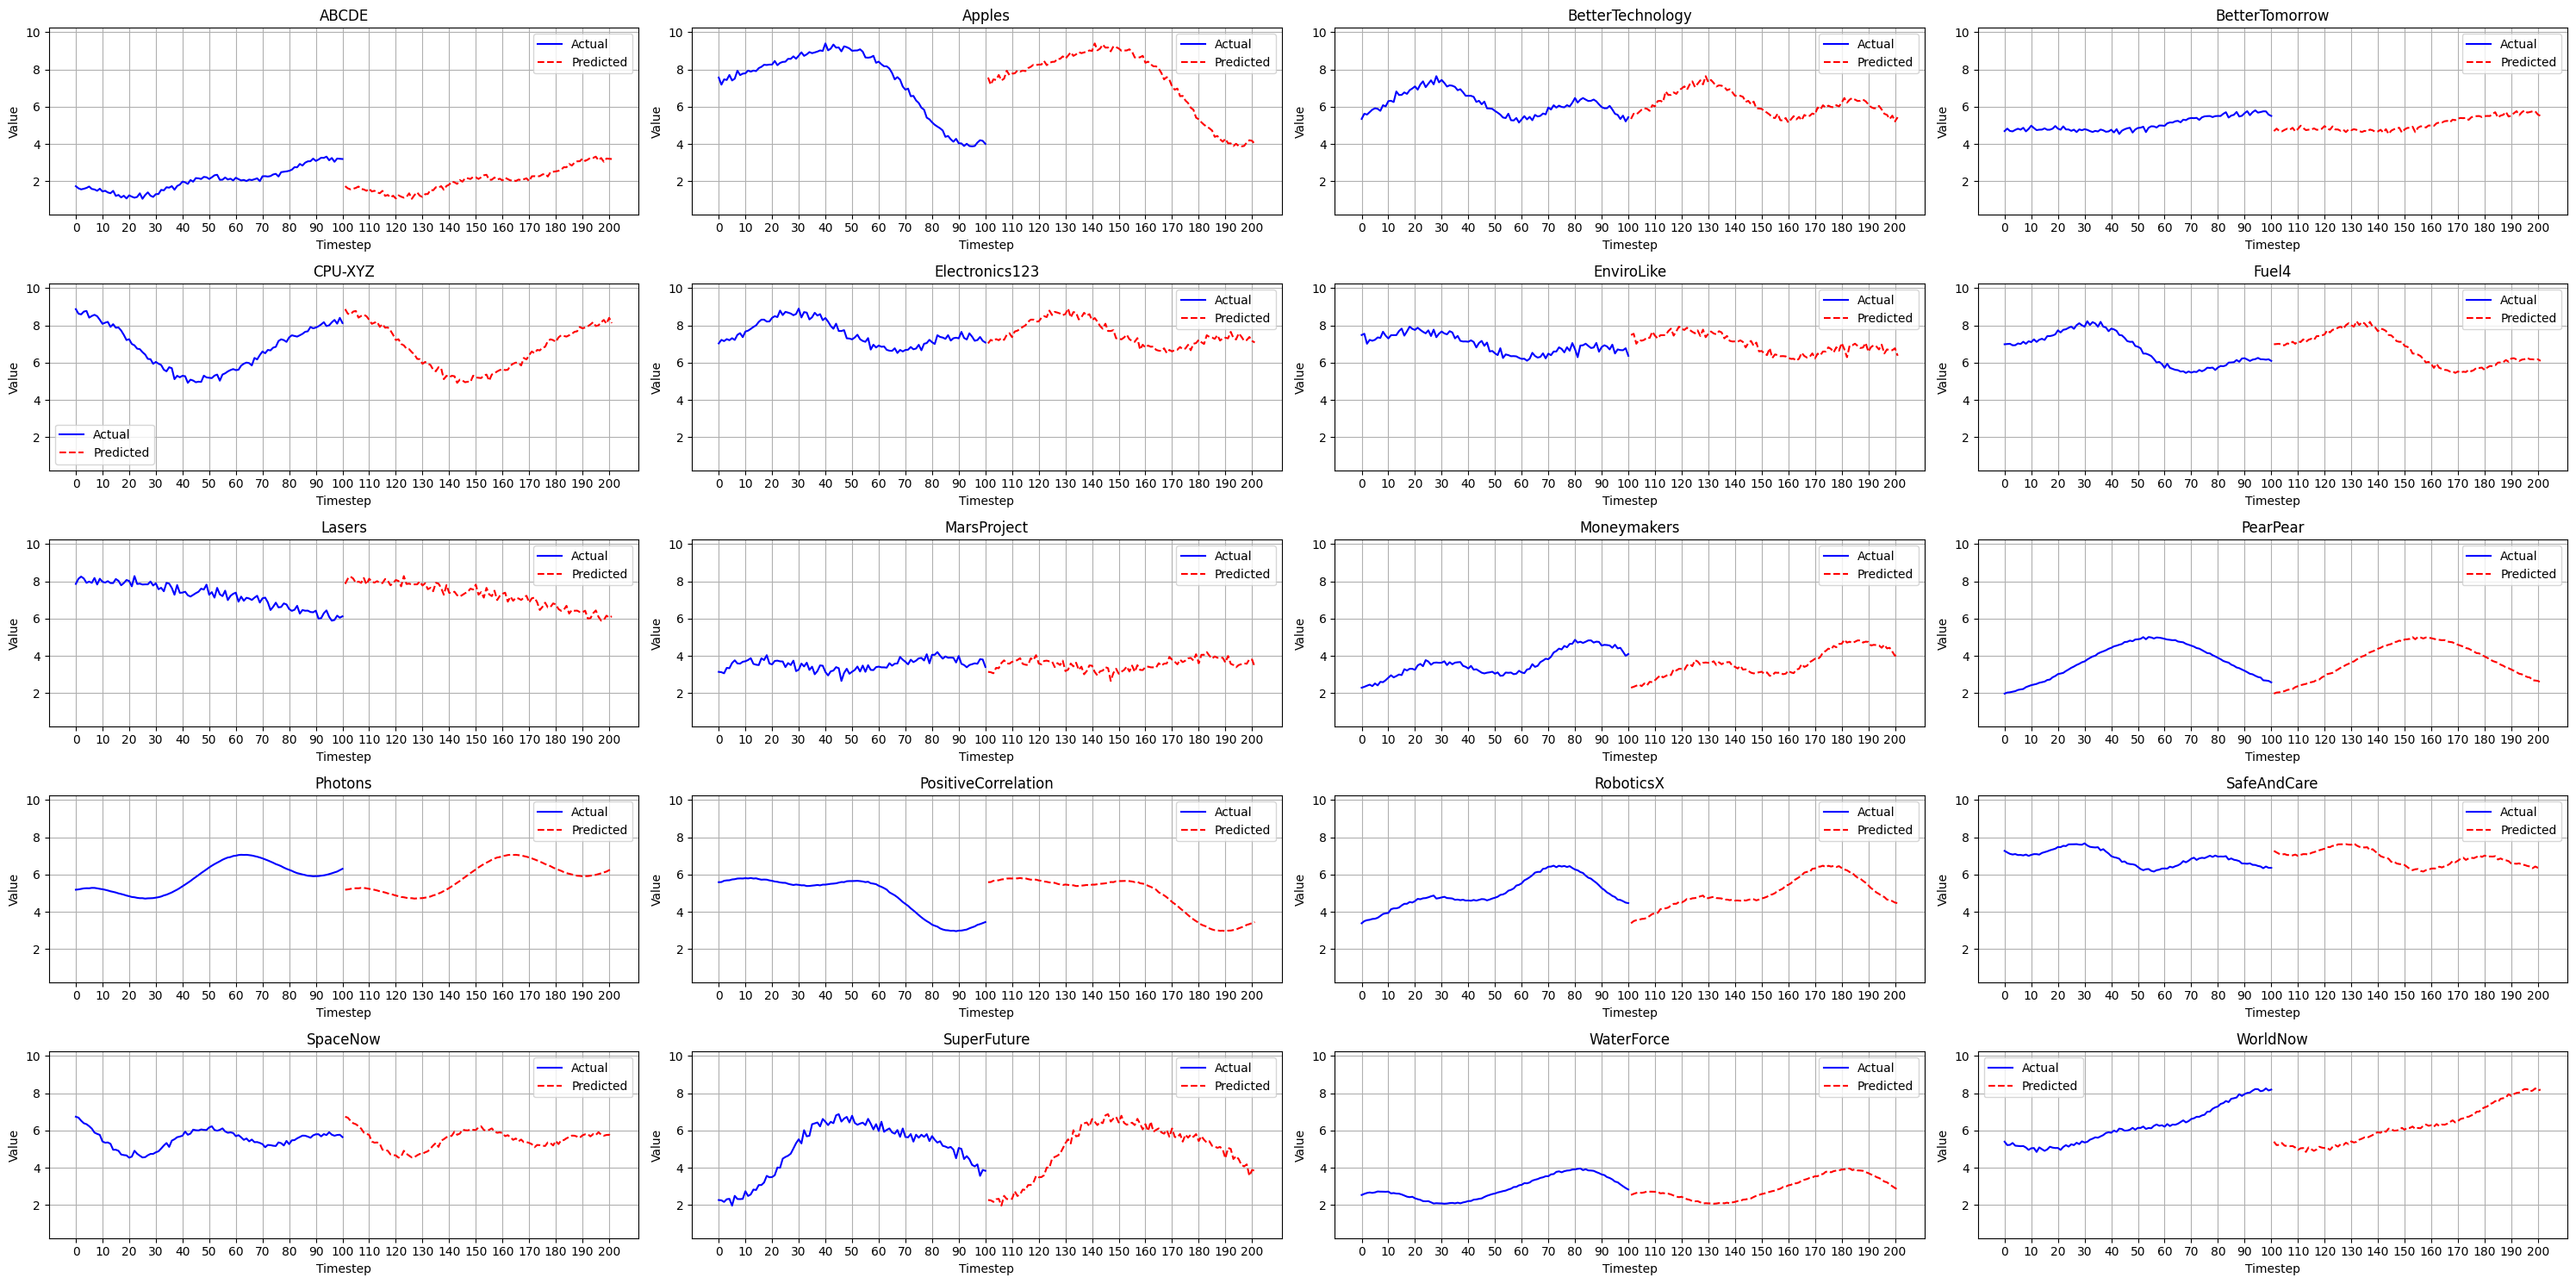

In [19]:
solver.plot_all_predictions(figsize=(30, 15), normalized_y=True)